In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 200
%matplotlib inline

# Data

In [92]:
df = pd.read_csv('processed_news_data.csv',parse_dates=['Date'])
df.head()

,Date,Title1,Title2,Title3,text,clean_text
0,2021-07-03,Baby boomers face financial distress and age discrimination,Gold-Obsessed Young Indians Invest Heavily In Crypto,"Gold Struggling On The Floor, Buy The Dip","Baby boomers face financial distress and age discrimination\nGold-Obsessed Young Indians Invest Heavily In Crypto\nGold Struggling On The Floor, Buy The Dip",baby boomer face financial distress age discrimination gold obsess young indians invest heavily crypto gold struggle floor buy dip
1,2021-07-02,NV Gold President/CEO resigns,Price of Gold Fundamental Daily Forecast – NFP Disappointing for Those Betting on Easy Policy Decision for Fed,"Gold ticks up, and the dollar index slides in first reaction to Friday's jobs reports","NV Gold President/CEO resigns\nPrice of Gold Fundamental Daily Forecast – NFP Disappointing for Those Betting on Easy Policy Decision for Fed\nGold ticks up, and the dollar index slides in first r...",nv gold president ceo resign price gold fundamental daily forecast nfp disappointing bet easy policy decision fed gold tick dollar index slide first reaction friday job report
2,2021-07-01,"Price of Gold Fundamental Daily Forecast – More Position-Squaring, Short-Covering Ahead of Friday’s NFP Report","Daily Gold News: Thursday, July 1 – Gold Getting Back Higher","Gold logs back-to-back gains to start July, second half of 2021","Price of Gold Fundamental Daily Forecast – More Position-Squaring, Short-Covering Ahead of Friday’s NFP Report\nDaily Gold News: Thursday, July 1 – Gold Getting Back Higher\nGold logs back-to-back...",price gold fundamental daily forecast position squaring short covering ahead fridays nfp report daily gold news thursday july gold get back high gold log back back gain start july second half
3,2021-06-30,"The Last Trading Day of the First Half of 2021 Concludes, and Gold Incurs Losses",Global shares fall on pandemic fears ahead of U.S. jobs report,Gold Records Worst Monthly Loss in Five Years on Fed ‘Taper-Tantrum’,"The Last Trading Day of the First Half of 2021 Concludes, and Gold Incurs Losses\nGlobal shares fall on pandemic fears ahead of U.S. jobs report\nGold Records Worst Monthly Loss in Five Years on F...",last trading day first half conclude gold incur loss global share fall pandemic fear ahead u job report gold record bad monthly loss five year fed taper tantrum
4,2021-06-29,"Gold Heads for Worst Month Since 2016 on Dollar Strength, Fed",Global shares edge lower on new COVID-19 outbreaks in Asia,Gold Drops as the U.S. Central Bank’s Vagueness Continues,"Gold Heads for Worst Month Since 2016 on Dollar Strength, Fed\nGlobal shares edge lower on new COVID-19 outbreaks in Asia\nGold Drops as the U.S. Central Bank’s Vagueness Continues",gold head bad month since dollar strength feed global share edge low new covid outbreak asia gold drop u central bank vagueness continue


# Corpus

In [93]:
norm_corpus = np.array(df['clean_text'])
norm_corpus

array(['baby boomer face financial distress age discrimination gold obsess young indians invest heavily crypto gold struggle floor buy dip',
       'nv gold president ceo resign price gold fundamental daily forecast nfp disappointing bet easy policy decision fed gold tick dollar index slide first reaction friday job report',
       'price gold fundamental daily forecast position squaring short covering ahead fridays nfp report daily gold news thursday july gold get back high gold log back back gain start july second half',
       'last trading day first half conclude gold incur loss global share fall pandemic fear ahead u job report gold record bad monthly loss five year fed taper tantrum',
       'gold head bad month since dollar strength feed global share edge low new covid outbreak asia gold drop u central bank vagueness continue',
       'gold head bad month since fed hawkish shift gold appear consolidate form base resistance day bitcoin update hash rate mining difficulty accumulat

# Bag of Words Model

In [94]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df=0.,max_df=1.)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix

<184x1078 sparse matrix of type '<class 'numpy.int64'>'
	with 3542 stored elements in Compressed Sparse Row format>

In [95]:
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [96]:
cv_matrix.shape

(184, 1078)

In [97]:
# get all unique words in the corpus
vocab = cv.get_feature_names()
vocab

['accept',
 'accumulate',
 'accumulation',
 'acquire',
 'acquisition',
 'act',
 'action',
 'acwi',
 'add',
 'additional',
 'address',
 'adjust',
 'admit',
 'adoption',
 'adp',
 'adps',
 'advance',
 'advisor',
 'affect',
 'affordable',
 'africa',
 'african',
 'age',
 'ago',
 'ahead',
 'aid',
 'alamos',
 'allocation',
 'alongside',
 'also',
 'altcoin',
 'alternative',
 'always',
 'american',
 'americans',
 'amid',
 'analyst',
 'anchor',
 'angst',
 'announce',
 'another',
 'answer',
 'anti',
 'anticipation',
 'appear',
 'apple',
 'area',
 'argentine',
 'argonaut',
 'argue',
 'aris',
 'ascend',
 'asia',
 'asian',
 'asset',
 'assurance',
 'attention',
 'attractive',
 'auction',
 'author',
 'avino',
 'await',
 'award',
 'baby',
 'back',
 'bad',
 'baffle',
 'ban',
 'bank',
 'barrick',
 'base',
 'basic',
 'battle',
 'bear',
 'bearish',
 'beat',
 'become',
 'behavior',
 'behind',
 'behold',
 'believe',
 'bet',
 'biden',
 'bidens',
 'big',
 'billion',
 'billionaire',
 'bind',
 'bitcoin',
 'bitco

In [98]:
# show document feature vectors
pd.DataFrame(cv_matrix,columns=vocab)

,accept,accumulate,accumulation,acquire,acquisition,act,action,acwi,add,additional,...,xbox,yamana,year,yellen,yellow,yesterday,yield,young,zealand,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
182,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Bag of N-Grams Model

In [99]:
# you can set the n-grams range to 1,2 to get unigrams as well as bigrmas
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix= bv.fit_transform(norm_corpus)

bv_matrix =  bv_matrix.toarray()
vocab = bv.get_feature_names()
pd.DataFrame(bv_matrix,columns=vocab)

,accept bitcoin,accept currency,accumulate btc,accumulation address,acquire share,acquire summit,acquisition corporation,act hedge,action meh,acwi end,...,yield spike,yield still,yield strip,yield surge,yield take,yield turquoise,yield weigh,young indians,zealand retirement,zone central
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
182,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
# you can set the n-grams range to 1,2 to get unigrams as well as bigrmas
bv = CountVectorizer(ngram_range=(1,2))
bv_matrix= bv.fit_transform(norm_corpus)

bv_matrix =  bv_matrix.toarray()
vocab = bv.get_feature_names()
pd.DataFrame(bv_matrix,columns=vocab)

,accept,accept bitcoin,accept currency,accumulate,accumulate btc,accumulation,accumulation address,acquire,acquire share,acquire summit,...,yield surge,yield take,yield turquoise,yield weigh,young,young indians,zealand,zealand retirement,zone,zone central
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
182,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# TF-IDF Model

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0,max_df=1, use_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(tv_matrix,columns=vocab)

,accumulate,accumulation,act,action,acwi,add,address,adjust,admit,adoption,...,weight,wheaton,wobble,woe,worldwide,wrap,xbox,yesterday,young,zealand
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.316228,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [102]:
tfidf_df = pd.DataFrame(tv_matrix,columns=vocab)
tfidf_df.head()

,accumulate,accumulation,act,action,acwi,add,address,adjust,admit,adoption,...,weight,wheaton,wobble,woe,worldwide,wrap,xbox,yesterday,young,zealand
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.316228,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [103]:
tfidf_df.to_csv('tfidf_features.csv')

# Join

In [104]:
join_df = df.join(tfidf_df)

In [105]:
join_df.head()

,Date,Title1,Title2,Title3,text,clean_text,accumulate,accumulation,act,action,...,weight,wheaton,wobble,woe,worldwide,wrap,xbox,yesterday,young,zealand
0,2021-07-03,Baby boomers face financial distress and age discrimination,Gold-Obsessed Young Indians Invest Heavily In Crypto,"Gold Struggling On The Floor, Buy The Dip","Baby boomers face financial distress and age discrimination\nGold-Obsessed Young Indians Invest Heavily In Crypto\nGold Struggling On The Floor, Buy The Dip",baby boomer face financial distress age discrimination gold obsess young indians invest heavily crypto gold struggle floor buy dip,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.316228,0.0
1,2021-07-02,NV Gold President/CEO resigns,Price of Gold Fundamental Daily Forecast – NFP Disappointing for Those Betting on Easy Policy Decision for Fed,"Gold ticks up, and the dollar index slides in first reaction to Friday's jobs reports","NV Gold President/CEO resigns\nPrice of Gold Fundamental Daily Forecast – NFP Disappointing for Those Betting on Easy Policy Decision for Fed\nGold ticks up, and the dollar index slides in first r...",nv gold president ceo resign price gold fundamental daily forecast nfp disappointing bet easy policy decision fed gold tick dollar index slide first reaction friday job report,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,2021-07-01,"Price of Gold Fundamental Daily Forecast – More Position-Squaring, Short-Covering Ahead of Friday’s NFP Report","Daily Gold News: Thursday, July 1 – Gold Getting Back Higher","Gold logs back-to-back gains to start July, second half of 2021","Price of Gold Fundamental Daily Forecast – More Position-Squaring, Short-Covering Ahead of Friday’s NFP Report\nDaily Gold News: Thursday, July 1 – Gold Getting Back Higher\nGold logs back-to-back...",price gold fundamental daily forecast position squaring short covering ahead fridays nfp report daily gold news thursday july gold get back high gold log back back gain start july second half,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,2021-06-30,"The Last Trading Day of the First Half of 2021 Concludes, and Gold Incurs Losses",Global shares fall on pandemic fears ahead of U.S. jobs report,Gold Records Worst Monthly Loss in Five Years on Fed ‘Taper-Tantrum’,"The Last Trading Day of the First Half of 2021 Concludes, and Gold Incurs Losses\nGlobal shares fall on pandemic fears ahead of U.S. jobs report\nGold Records Worst Monthly Loss in Five Years on F...",last trading day first half conclude gold incur loss global share fall pandemic fear ahead u job report gold record bad monthly loss five year fed taper tantrum,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,2021-06-29,"Gold Heads for Worst Month Since 2016 on Dollar Strength, Fed",Global shares edge lower on new COVID-19 outbreaks in Asia,Gold Drops as the U.S. Central Bank’s Vagueness Continues,"Gold Heads for Worst Month Since 2016 on Dollar Strength, Fed\nGlobal shares edge lower on new COVID-19 outbreaks in Asia\nGold Drops as the U.S. Central Bank’s Vagueness Continues",gold head bad month since dollar strength feed global share edge low new covid outbreak asia gold drop u central bank vagueness continue,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [106]:
join_df.columns

Index(['Date', 'Title1', 'Title2', 'Title3', 'text', 'clean_text',
       'accumulate', 'accumulation', 'act', 'action',
       ...
       'weight', 'wheaton', 'wobble', 'woe', 'worldwide', 'wrap', 'xbox',
       'yesterday', 'young', 'zealand'],
      dtype='object', length=626)

In [107]:
col_list = ['Date']

In [108]:
vocab

['accumulate',
 'accumulation',
 'act',
 'action',
 'acwi',
 'add',
 'address',
 'adjust',
 'admit',
 'adoption',
 'adp',
 'adps',
 'advisor',
 'affect',
 'affordable',
 'africa',
 'age',
 'ago',
 'aid',
 'allocation',
 'alongside',
 'also',
 'altcoin',
 'always',
 'american',
 'americans',
 'anchor',
 'angst',
 'answer',
 'anti',
 'anticipation',
 'appear',
 'apple',
 'area',
 'argentine',
 'argonaut',
 'aris',
 'ascend',
 'asia',
 'assurance',
 'attention',
 'auction',
 'avino',
 'award',
 'baby',
 'baffle',
 'ban',
 'base',
 'basic',
 'behavior',
 'behind',
 'behold',
 'believe',
 'bind',
 'bitcoiner',
 'bite',
 'blackrock',
 'bloodbath',
 'blow',
 'blue',
 'bold',
 'boomer',
 'bottoming',
 'brace',
 'breadth',
 'breakout',
 'btcs',
 'budge',
 'bug',
 'bullion',
 'bullishness',
 'buoy',
 'burn',
 'burner',
 'business',
 'busy',
 'calls',
 'canadian',
 'candidate',
 'cantillon',
 'capitol',
 'case',
 'catalyst',
 'cautious',
 'century',
 'cgg',
 'chair',
 'change',
 'changed',
 'chin

In [109]:
col_list.extend(vocab)

In [110]:
col_list

['Date',
 'accumulate',
 'accumulation',
 'act',
 'action',
 'acwi',
 'add',
 'address',
 'adjust',
 'admit',
 'adoption',
 'adp',
 'adps',
 'advisor',
 'affect',
 'affordable',
 'africa',
 'age',
 'ago',
 'aid',
 'allocation',
 'alongside',
 'also',
 'altcoin',
 'always',
 'american',
 'americans',
 'anchor',
 'angst',
 'answer',
 'anti',
 'anticipation',
 'appear',
 'apple',
 'area',
 'argentine',
 'argonaut',
 'aris',
 'ascend',
 'asia',
 'assurance',
 'attention',
 'auction',
 'avino',
 'award',
 'baby',
 'baffle',
 'ban',
 'base',
 'basic',
 'behavior',
 'behind',
 'behold',
 'believe',
 'bind',
 'bitcoiner',
 'bite',
 'blackrock',
 'bloodbath',
 'blow',
 'blue',
 'bold',
 'boomer',
 'bottoming',
 'brace',
 'breadth',
 'breakout',
 'btcs',
 'budge',
 'bug',
 'bullion',
 'bullishness',
 'buoy',
 'burn',
 'burner',
 'business',
 'busy',
 'calls',
 'canadian',
 'candidate',
 'cantillon',
 'capitol',
 'case',
 'catalyst',
 'cautious',
 'century',
 'cgg',
 'chair',
 'change',
 'changed

In [111]:
len(vocab),len(col_list)

(620, 621)

In [112]:
feat_df = join_df[col_list]

In [113]:
feat_df.head()

,Date,accumulate,accumulation,act,action,acwi,add,address,adjust,admit,...,weight,wheaton,wobble,woe,worldwide,wrap,xbox,yesterday,young,zealand
0,2021-07-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.316228,0.0
1,2021-07-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,2021-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,2021-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,2021-06-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


# Price Data

In [133]:
price_df = pd.read_csv('Gold_Historical_Data_01-01-2021_07-04-2021 .csv',parse_dates=['Date'],index_col='Date')

In [134]:
price_df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2021-07-04,"1,786.40","1,788.00","1,788.00","1,785.80",-,0.17%
2021-07-02,"1,783.30","1,777.50","1,795.90","1,774.40",205.86K,0.37%
2021-07-01,"1,776.80","1,770.80","1,783.40","1,765.90",171.44K,0.29%
2021-06-30,"1,771.60","1,761.90","1,774.70","1,753.20",177.89K,0.45%
2021-06-29,"1,763.60","1,778.80","1,779.20","1,750.10",239.91K,-0.96%


In [135]:
df2 = price_df.reset_index()

In [136]:
df2.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-07-04,"1,786.40","1,788.00","1,788.00","1,785.80",-,0.17%
1,2021-07-02,"1,783.30","1,777.50","1,795.90","1,774.40",205.86K,0.37%
2,2021-07-01,"1,776.80","1,770.80","1,783.40","1,765.90",171.44K,0.29%
3,2021-06-30,"1,771.60","1,761.90","1,774.70","1,753.20",177.89K,0.45%
4,2021-06-29,"1,763.60","1,778.80","1,779.20","1,750.10",239.91K,-0.96%


In [138]:
r = pd.date_range(start=df2.Date.min(), end=df2.Date.max())
df2=df2.set_index('Date').reindex(r).fillna(np.nan).rename_axis('Date').reset_index()

In [139]:
df2.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-01-01,"1,901.60","1,901.60","1,901.60","1,901.60",-,-0.22%
1,2021-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-04,"1,957.60","1,927.20","1,959.20","1,926.90",1.25K,2.94%
4,2021-01-05,"1,965.20","1,955.00","1,965.90","1,953.70",2.22K,0.39%


In [123]:
df2.shape

(185, 7)

In [140]:
df2.tail()

,Date,Price,Open,High,Low,Vol.,Change %
180,2021-06-30,"1,771.60","1,761.90","1,774.70","1,753.20",177.89K,0.45%
181,2021-07-01,"1,776.80","1,770.80","1,783.40","1,765.90",171.44K,0.29%
182,2021-07-02,"1,783.30","1,777.50","1,795.90","1,774.40",205.86K,0.37%
183,2021-07-03,NaN,NaN,NaN,NaN,NaN,NaN
184,2021-07-04,"1,786.40","1,788.00","1,788.00","1,785.80",-,0.17%


In [141]:
df2.drop(df2.index[-1],inplace=True)

In [142]:
df2.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-01-01,"1,901.60","1,901.60","1,901.60","1,901.60",-,-0.22%
1,2021-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-04,"1,957.60","1,927.20","1,959.20","1,926.90",1.25K,2.94%
4,2021-01-05,"1,965.20","1,955.00","1,965.90","1,953.70",2.22K,0.39%


In [127]:
df2.shape

(184, 7)

In [143]:
price_df2 = df2[['Date','Price']]

In [144]:
price_df2.head()

,Date,Price
0,2021-01-01,"1,901.60"
1,2021-01-02,NaN
2,2021-01-03,NaN
3,2021-01-04,"1,957.60"
4,2021-01-05,"1,965.20"


In [132]:
feat_df.head()

,Date,accumulate,accumulation,act,action,acwi,add,address,adjust,admit,...,weight,wheaton,wobble,woe,worldwide,wrap,xbox,yesterday,young,zealand
0,2021-07-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.316228,0.0
1,2021-07-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,2021-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,2021-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,2021-06-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


# Merge Data

In [146]:
final_df = pd.merge(feat_df,price_df2,on='Date')

In [147]:
final_df.head()

,Date,accumulate,accumulation,act,action,acwi,add,address,adjust,admit,...,wheaton,wobble,woe,worldwide,wrap,xbox,yesterday,young,zealand,Price
0,2021-07-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.316228,0.0,NaN
1,2021-07-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,"1,783.30"
2,2021-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,"1,776.80"
3,2021-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,"1,771.60"
4,2021-06-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,"1,763.60"


In [149]:
final_df.isna().sum()

Date             0
accumulate       0
accumulation     0
act              0
action           0
                ..
xbox             0
yesterday        0
young            0
zealand          0
Price           51
Length: 622, dtype: int64

In [150]:
final_df.to_csv('final_process-merge-data.csv')

# Getting Date Feature

In [151]:
final_df.Date.dt.year

0      2021
1      2021
2      2021
3      2021
4      2021
       ... 
179    2021
180    2021
181    2021
182    2021
183    2021
Name: Date, Length: 184, dtype: int64

In [152]:
final_df['year'] = final_df.Date.dt.year

In [154]:
final_df.Date.dt.month


0      7
1      7
2      7
3      6
4      6
      ..
179    1
180    1
181    1
182    1
183    1
Name: Date, Length: 184, dtype: int64

In [155]:
final_df['month'] = final_df.Date.dt.month

In [156]:
final_df.Date.dt.day

0       3
1       2
2       1
3      30
4      29
       ..
179     5
180     4
181     3
182     2
183     1
Name: Date, Length: 184, dtype: int64

In [157]:
final_df['day'] = final_df.Date.dt.day

In [158]:
final_df.Date.dt.dayofyear

0      184
1      183
2      182
3      181
4      180
      ... 
179      5
180      4
181      3
182      2
183      1
Name: Date, Length: 184, dtype: int64

In [159]:
final_df['dayofyear'] = final_df.Date.dt.dayofyear

In [160]:
final_df.Date.dt.quarter

0      3
1      3
2      3
3      2
4      2
      ..
179    1
180    1
181    1
182    1
183    1
Name: Date, Length: 184, dtype: int64

In [161]:
final_df['quarter'] = final_df.Date.dt.quarter

In [162]:
final_df.head()

,Date,accumulate,accumulation,act,action,acwi,add,address,adjust,admit,...,wrap,xbox,yesterday,young,zealand,Price,year,month,day,dayofyear
0,2021-07-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.316228,0.0,NaN,2021,7,3,184
1,2021-07-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,"1,783.30",2021,7,2,183
2,2021-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,"1,776.80",2021,7,1,182
3,2021-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,"1,771.60",2021,6,30,181
4,2021-06-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,"1,763.60",2021,6,29,180


In [164]:
final_df.Date.dt.is_month_end

0      False
1      False
2      False
3       True
4      False
       ...  
179    False
180    False
181    False
182    False
183    False
Name: Date, Length: 184, dtype: bool

In [169]:
final_df['is_month_end'] = final_df.Date.dt.is_month_end

In [168]:
final_df.Date.dt.is_month_start

0      False
1      False
2       True
3      False
4      False
       ...  
179    False
180    False
181    False
182    False
183     True
Name: Date, Length: 184, dtype: bool

In [170]:
final_df['is_month_start'] = final_df.Date.dt.is_month_start

In [171]:
final_df.head()

,Date,accumulate,accumulation,act,action,acwi,add,address,adjust,admit,...,yesterday,young,zealand,Price,year,month,day,dayofyear,is_month_end,is_month_start
0,2021-07-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.316228,0.0,NaN,2021,7,3,184,False,False
1,2021-07-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,"1,783.30",2021,7,2,183,False,False
2,2021-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,"1,776.80",2021,7,1,182,False,True
3,2021-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,"1,771.60",2021,6,30,181,True,False
4,2021-06-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,"1,763.60",2021,6,29,180,False,False


In [172]:
final_df.to_csv('final_process-merge-data.csv')

In [225]:
df = pd.read_excel('C:/Users/matar/Downloads/AAPL.xls',parse_dates=['Date'])

In [226]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,day_of_week
0,0,2020-07-20,96.417503,98.500000,96.062500,98.357498,97.699188,90318000,Monday
1,1,2020-07-21,99.172501,99.250000,96.742500,97.000000,96.350784,103433200,Tuesday
2,2,2020-07-22,96.692497,97.974998,96.602501,97.272499,96.621452,89001600,Wednesday
3,3,2020-07-23,96.997498,97.077499,92.010002,92.845001,92.223587,197004400,Thursday
4,4,2020-07-24,90.987503,92.970001,89.144997,92.614998,91.995125,185438800,Friday


In [194]:
#df['day_of_week'] = df['Date'].dt.day_name()

In [227]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [228]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,day_of_week
246,2021-07-12,146.210007,146.320007,144.000000,144.500000,144.500000,76299700,Monday
247,2021-07-13,144.029999,147.460007,143.630005,145.639999,145.639999,100827100,Tuesday
248,2021-07-14,148.100006,149.570007,147.679993,149.149994,149.149994,127050800,Wednesday
249,2021-07-15,149.240005,150.000000,147.089996,148.479996,148.479996,106820300,Thursday
250,2021-07-16,148.460007,149.759995,145.880005,146.389999,146.389999,93100300,Friday


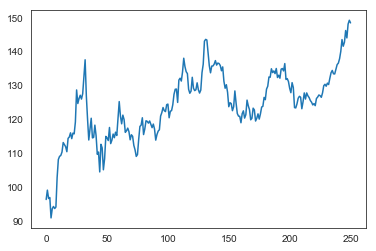

In [230]:
df['Open'].plot()

In [186]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,day_of_week
0,2020-07-20,96.417503,98.500000,96.062500,98.357498,97.699188,90318000,Monday
1,2020-07-21,99.172501,99.250000,96.742500,97.000000,96.350784,103433200,Tuesday
2,2020-07-22,96.692497,97.974998,96.602501,97.272499,96.621452,89001600,Wednesday
3,2020-07-23,96.997498,97.077499,92.010002,92.845001,92.223587,197004400,Thursday
4,2020-07-24,90.987503,92.970001,89.144997,92.614998,91.995125,185438800,Friday
...,...,...,...,...,...,...,...,...
246,2021-07-12,146.210007,146.320007,144.000000,144.500000,144.500000,76299700,Monday
247,2021-07-13,144.029999,147.460007,143.630005,145.639999,145.639999,100827100,Tuesday
248,2021-07-14,148.100006,149.570007,147.679993,149.149994,149.149994,127050800,Wednesday
249,2021-07-15,149.240005,150.000000,147.089996,148.479996,148.479996,106820300,Thursday


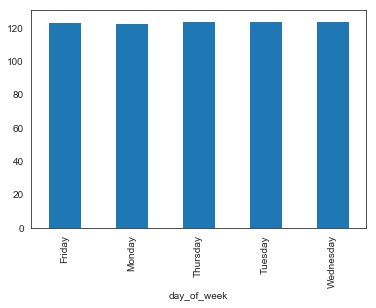

In [231]:
df[['day_of_week', 'Open']].groupby('day_of_week').mean().plot(kind='bar', legend=None)

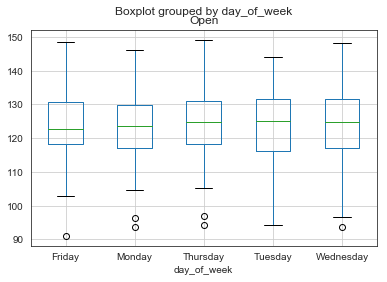

In [232]:
df.boxplot(column=['Open'],by='day_of_week')

In [235]:
df.Date.dt.weekofyear

0      30
1      30
2      30
3      30
4      30
       ..
246    28
247    28
248    28
249    28
250    28
Name: Date, Length: 251, dtype: int64

In [236]:
df['week'] = df.Date.dt.weekofyear

In [237]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day_of_week,week
0,2020-07-20,96.417503,98.500000,96.062500,98.357498,97.699188,90318000,Monday,30
1,2020-07-21,99.172501,99.250000,96.742500,97.000000,96.350784,103433200,Tuesday,30
2,2020-07-22,96.692497,97.974998,96.602501,97.272499,96.621452,89001600,Wednesday,30
3,2020-07-23,96.997498,97.077499,92.010002,92.845001,92.223587,197004400,Thursday,30
4,2020-07-24,90.987503,92.970001,89.144997,92.614998,91.995125,185438800,Friday,30


In [242]:
df[df['day_of_week']!='Frdiay'].groupby('week').mean()['Open']

week
1     130.184000
2     129.206000
3     131.630001
4     141.090002
5     135.778000
6     135.875998
7     131.545002
8     124.795999
9     123.940001
10    120.918001
11    122.788001
12    121.274001
13    121.767502
14    126.990001
15    133.604004
16    133.217999
17    134.479999
18    130.233999
19    125.428002
20    125.918001
21    126.560001
22    124.527500
23    126.705998
24    129.728001
25    132.822003
26    135.776001
27    141.985001
28    147.208005
30     96.053500
31     95.780000
32    110.064000
33    112.865500
34    116.281999
35    126.545999
36    128.981999
37    116.535000
38    113.680002
39    108.488000
40    114.776001
41    115.152001
42    121.265999
43    117.333998
44    113.596001
45    113.836000
46    118.460002
47    118.661999
48    115.802502
49    121.223999
50    122.828000
51    126.442000
52    130.027502
53    135.425003
Name: Open, dtype: float64

In [245]:
df[df['day_of_week']!='Friday'].groupby('week').mean()['Open']

week
1     129.622501
2     129.312500
3     130.080002
4     142.405002
5     135.384998
6     136.257496
7     131.980001
8     125.347500
9     124.680001
10    121.047501
11    123.510000
12    121.505001
13    121.767502
14    126.287501
15    133.430004
16    133.482498
17    135.154999
18    130.079998
19    125.222502
20    125.442501
21    126.807501
22    124.680000
23    126.749998
24    129.482500
25    132.662502
26    135.245003
27    141.730001
28    146.895004
30     97.320000
31     94.003750
32    109.278750
33    112.374374
34    115.536875
35    126.679375
36    131.209999
37    117.190000
38    114.500002
39    108.502500
40    115.247501
41    115.120001
42    121.262499
43    117.569998
44    114.230002
45    112.715000
46    118.215002
47    118.667499
48    115.546669
49    120.879999
50    122.927500
51    125.812498
52    130.027502
53    135.425003
Name: Open, dtype: float64

In [247]:
df[df['day_of_week']=='Friday']['Open']

4       90.987503
9      102.885002
14     113.205002
19     114.830002
24     119.262497
29     126.012497
34     120.070000
38     114.570000
43     110.400002
48     108.430000
53     112.889999
58     115.279999
63     121.279999
68     116.389999
73     111.059998
78     118.320000
83     119.440002
88     118.639999
92     116.570000
97     122.599998
102    122.430000
107    128.960007
120    132.429993
125    128.779999
129    136.279999
134    135.830002
139    137.350006
144    134.350006
148    130.240005
153    122.589996
158    120.980003
163    120.400002
168    119.900002
173    120.349998
182    129.800003
187    134.300003
192    132.160004
197    131.779999
202    130.850006
207    126.250000
212    127.820000
217    125.570000
221    124.070000
226    126.529999
231    130.710007
236    133.460007
241    137.899994
245    142.750000
250    148.460007
Name: Open, dtype: float64

In [250]:
df2 = pd.DataFrame(np.array(df[df['day_of_week']!='Friday'].groupby('week').mean()['Open']),columns=['Other days'])

In [251]:
df2.head()

,Other days
0,129.622501
1,129.312500
2,130.080002
3,142.405002
4,135.384998


In [252]:
df2.to_excel('other_days.xls')

In [261]:
df3 = pd.DataFrame(np.array(df[df['day_of_week']=='Friday']['Open']),columns=['Friday'])

In [262]:
df3.head()

,Friday
0,90.987503
1,102.885002
2,113.205002
3,114.830002
4,119.262497


In [263]:
df3.to_excel('Friday.xls')

In [264]:
pwd

'C:\\Users\\matar\\Desktop\\myBP_projectData'